In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load in the data
minimum_wage_data = "Resources/Minimum Wage Data.csv"


minimum_wage_df = pd.read_csv(minimum_wage_data, encoding="ISO-8859-1")
#minimum_wage_df.head()

minimmum_wage_by_state = minimum_wage_df.groupby(["State", "Year"])
#minimmum_wage_by_state.head()

In [2]:
# import cleaned unemployment data

unemployment_data = "Resources/clean_unemployment_data.csv"

unemployment_df = pd.read_csv(unemployment_data)


In [3]:
# filtered minimum wage data for years between 2009-2017
mw = minimum_wage_df.drop(["Table_Data", "Footnote"], 1)
cmw = mw[mw["Year"]>2008]


In [4]:
Uemp_min_wage = pd.merge(unemployment_df, cmw, how="left", on=["Year", "State"])


In [5]:
# read in the crime data
crime_df = pd.read_csv("Resources/crimetotal.csv")

crime_df1 = crime_df.dropna()
crime_df1["Year"]=crime_df1['Year'].astype(int)


cleaned = pd.merge(Uemp_min_wage, crime_df1, how="left", left_on=["Year","State"], right_on=["Year", "State"])



C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [31]:
data = cleaned[["State","Year","Avg UI", "High.2018","CPI.Average", "Total Crime Rate"]]
data.State.iloc[60] = "D.C."
data.to_csv("Resources/data.csv")

C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
average_UI = data.pivot(index= 'Year', columns = 'State', values = 'Avg UI')
crimerate = data.pivot(index= 'Year', columns = 'State', values = 'Total Crime Rate')
adjusted_minwage = data.pivot(index= 'Year', columns = 'State', values = 'High.2018')
crimerate

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,D.C.,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2009,8460.9,7147.5,8031.0,8581.8,6408.7,6019.1,5298.6,NaN,7998.3,8906.6,...,3977.2,8865.2,9012.7,7020.7,5097.4,5384.4,8031.9,5689.5,5741.9,NaN
2010,7823.3,6944.2,7900.3,8114.0,6138.8,5996.5,4941.6,NaN,8154.4,8185.3,...,4257.7,8549.4,8430.4,6790.9,4786.5,5099.4,8025.1,5056.7,5514.9,NaN
2011,8050.4,6495.7,7937.9,8480.5,5990.8,5819.3,4856.6,NaN,7996.0,8064.0,...,4226.4,8431.4,7783.6,6369.6,5110.5,4908.9,7748.9,4798.7,5400.6,NaN
2012,7911.6,6695.4,7930.9,8355.7,6370.6,5985.5,4864.1,NaN,7797.8,7526.3,...,4802.2,8029.2,7543.4,6460.8,5286.0,4742.1,7974.3,5433.9,5486.4,NaN
2013,7557.7,7031.4,7562.0,8123.8,6107.7,5920.8,4484.9,NaN,7270.2,7134.2,...,4496.0,7564.6,7327.0,6544.0,4676.4,4544.3,8011.8,4918.6,4938.7,NaN
2014,7209.9,6791.7,7194.7,7636.2,5674.4,5678.3,4314.6,NaN,6942.2,7911.8,...,4380.7,7338.0,6850.7,6188.3,3247.3,4253.0,7982.7,4673.4,4757.4,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
crimeratechange =  (crimerate/crimerate.iloc[0]) * 100
crimeratechange
statebin= pd.qcut(crimeratechange.iloc[5,], 5, labels=["Very High", "High", "Medium", "Low", "Very Low"])
statebin= pd.DataFrame(statebin)

In [9]:
binneddata = data.merge(statebin, how="inner", on = "State")
binneddata = pd.DataFrame.rename(binneddata, columns={2014:"Bins"})
binneddata.head()

,State,Year,Avg UI,High.2018,CPI.Average,Total Crime Rate,Bins
0,Alabama,2009,9.8,0.0,214.537000,8460.9,High
1,Alabama,2010,10.0,0.0,218.055500,7823.3,High
2,Alabama,2011,9.4,0.0,224.939167,8050.4,High
3,Alabama,2012,7.7,0.0,229.593917,7911.6,High
4,Alabama,2013,6.6,0.0,232.957083,7557.7,High


<Figure size 432x288 with 0 Axes>

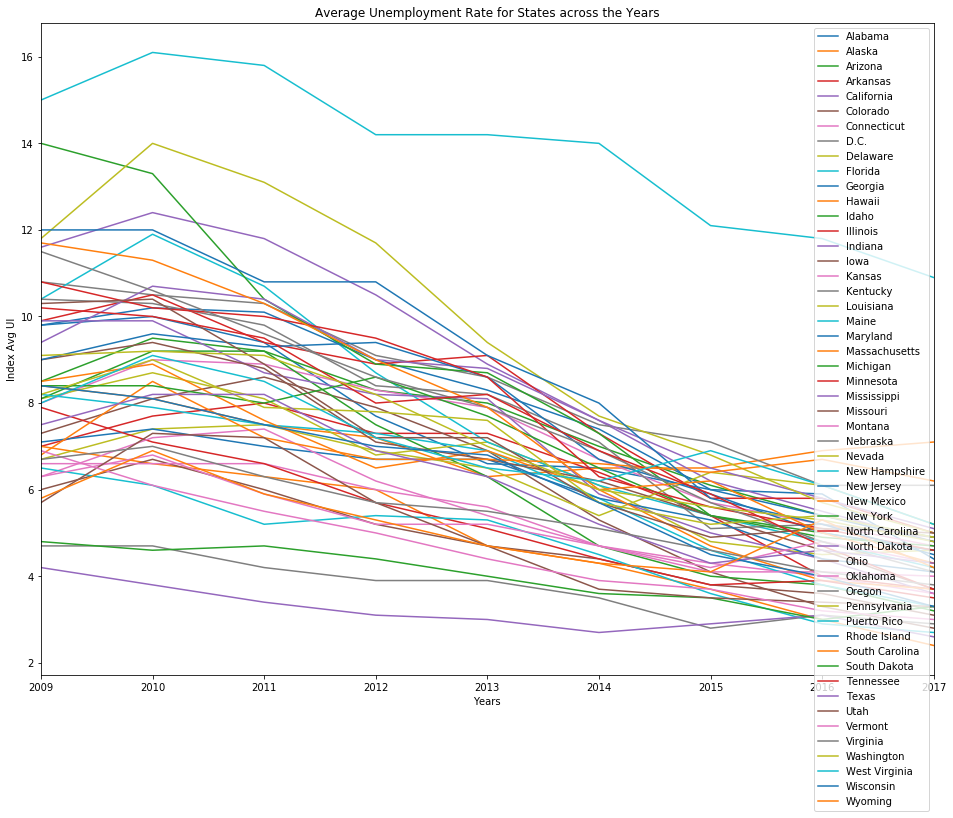

<Figure size 432x288 with 0 Axes>

In [22]:
#Plotting all States for UI
fig = plt.figure()
fig, ax = plt.subplots()

# for category in binneddata.groupby(["Bins"]):
for State, grp in data.groupby(['State']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, figsize = (16, 12))

ax.set_xlabel('Years')
ax.set_ylabel('Index Avg UI')
ax.set_title("Average Unemployment Rate for States across the Years")

plt.legend(loc='best')
plt.show()
plt.savefig("plots/UI_States.png")

In [11]:
binned = binneddata.groupby(["Bins"])

<Figure size 432x288 with 0 Axes>

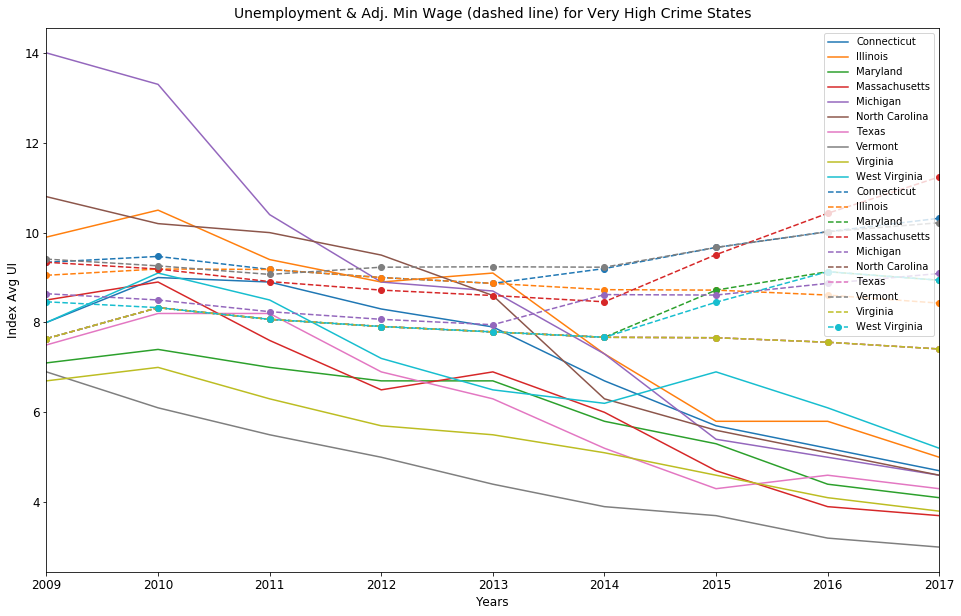

In [23]:
#Plots for Very high Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Very High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Very High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='High.2018', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Very High Crime States", fontsize = 14, pad=10)
plt.savefig("plots/UI_wage_States_vhigh.png")

<Figure size 432x288 with 0 Axes>

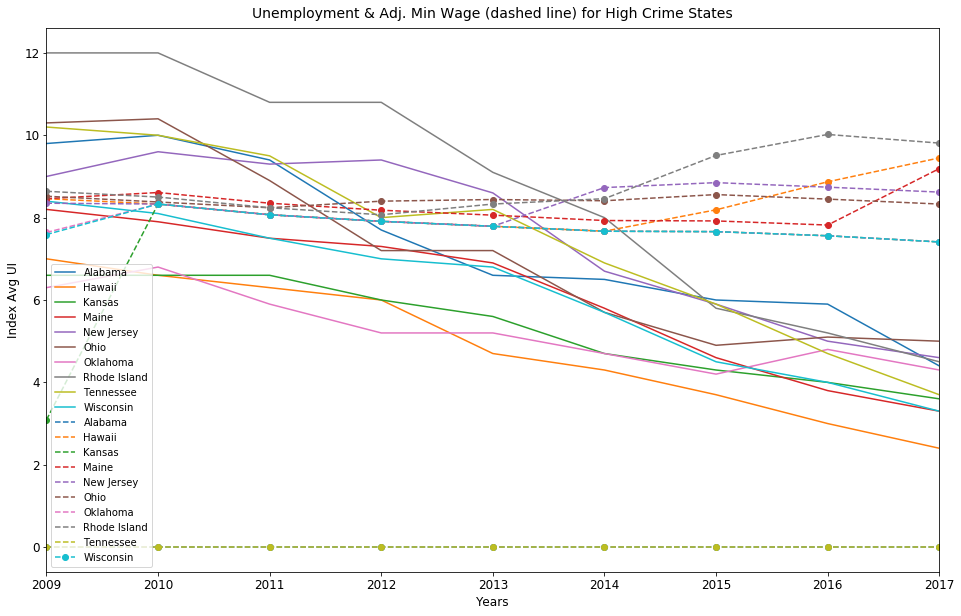

In [24]:
#Plots for High Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='High.2018', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for High Crime States", fontsize = 14, pad=10)
plt.savefig("plots/UI_wage_States_high.png")

<Figure size 432x288 with 0 Axes>

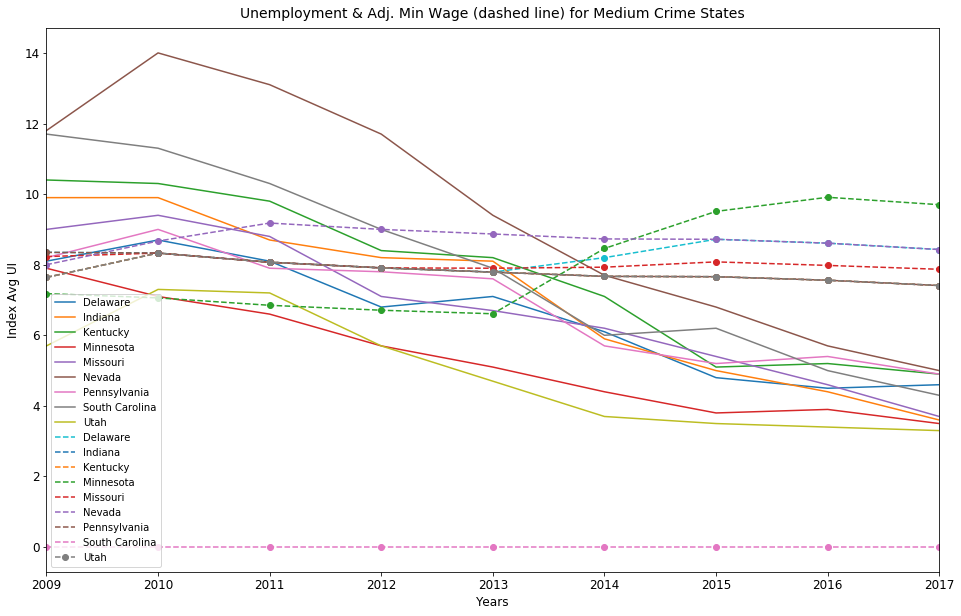

In [25]:
#Plots for Medium Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Medium').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Medium').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='High.2018', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )

ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Medium Crime States", fontsize = 14, pad=10)
plt.savefig("plots/UI_wage_States_medium.png")

<Figure size 432x288 with 0 Axes>

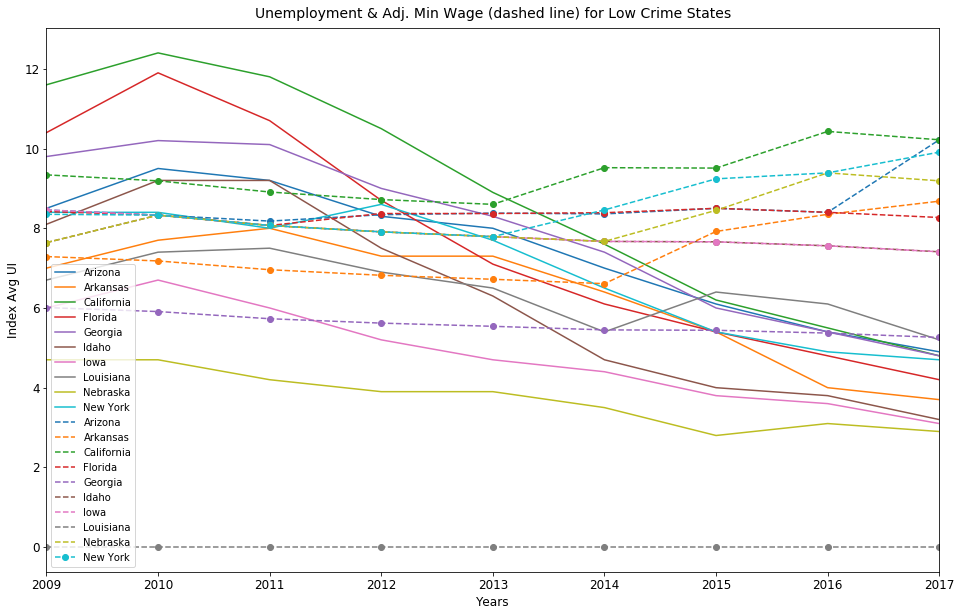

In [26]:
#Plots for Low Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='High.2018', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Low Crime States", fontsize = 14, pad=10)
plt.savefig("plots/UI_wage_States_low.png")

<Figure size 432x288 with 0 Axes>

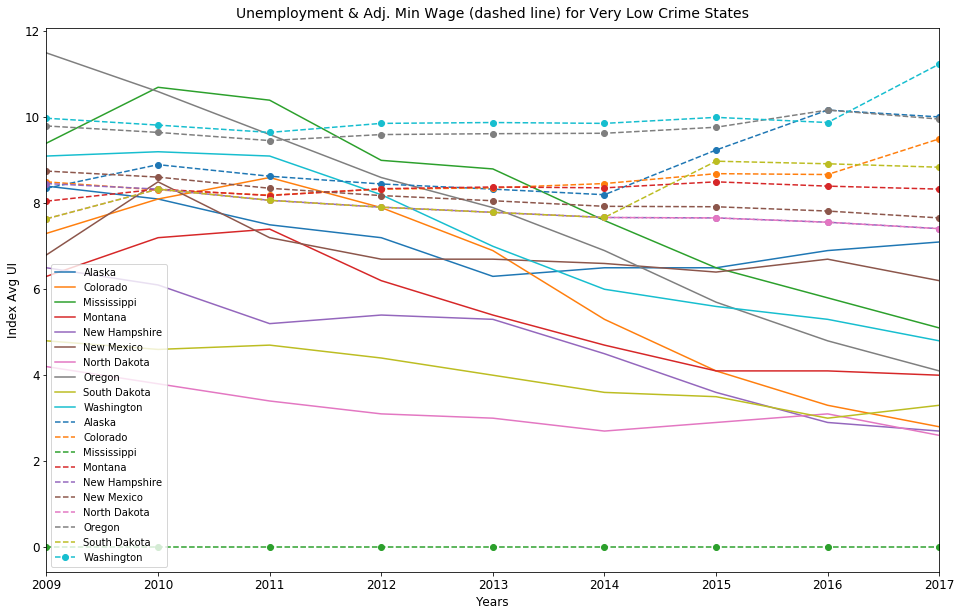

In [27]:
#Plots for Very Low Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Very Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Very Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='High.2018', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Very Low Crime States", fontsize = 14, pad=10)
plt.savefig("plots/UI_wage_States_vlow.png")

C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


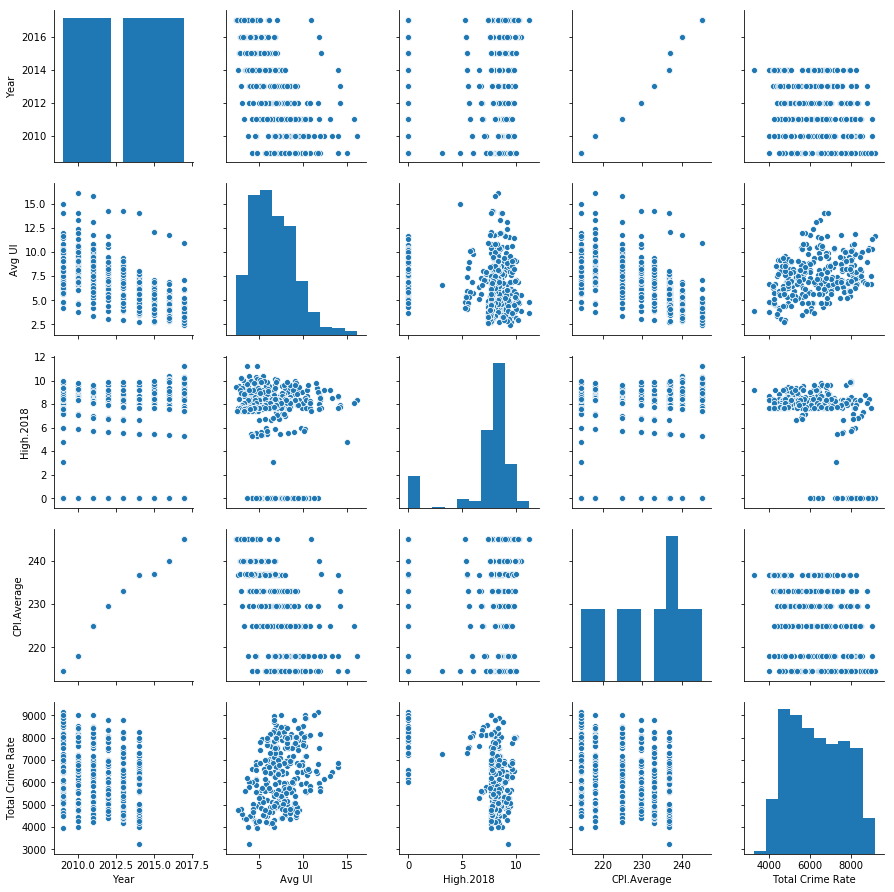

In [17]:
import seaborn as sns
sns.pairplot(binneddata)

C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


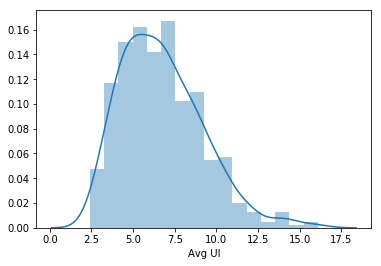

In [28]:
sns.distplot(binneddata['Avg UI'])
plt.savefig("plots/avgUI.png")

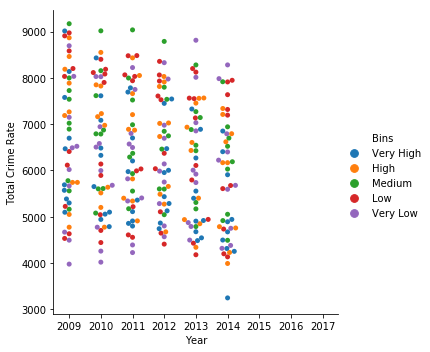

In [30]:
sns.catplot(x="Year", y="Total Crime Rate", data=binneddata, legend = True, kind = "swarm", hue = "Bins")
plt.savefig('plots/Crime Rate Over years.png')
plt.set_title = "Crime Rate Over years"

In [20]:
cmw = mw[mw["Year"]>2008]